In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

# Inputs

In [2]:
input_dir = './Inputs_Assessment_Task_3_Laboratory_Report/'
output_dir = './Outputs_Assessment_Task_3_Laboratory_Report/'

print(
    input_dir,
    output_dir,
    sep='\n'
    )

./Inputs_Assessment_Task_3_Laboratory_Report/
./Outputs_Assessment_Task_3_Laboratory_Report/


# create output directory

In [3]:
def create_output_dir(arg_output_dir):
    """create output directory if it does not exist

    arguments:
        [string] --> arg_output_dir = path of the output directory name
    """
    if not os.path.exists(arg_output_dir):
        os.makedirs(arg_output_dir)

In [4]:
create_output_dir(output_dir)
output_dir

'./Outputs_Assessment_Task_3_Laboratory_Report/'

# Bernoulli apparatus properties

In [5]:
dist = pd.Series(data=[0, 0.06028, 0.06868, 0.07318, 0.08108, 0.14154],name='dist')
area = pd.Series(data=[0.00049, 0.00015, 0.00011, 0.00009, 0.000079, 0.00049], name='area')
bernoulli_aparatus = pd.concat([dist, area], axis=1)
bernoulli_aparatus

,dist,area
0,0.00000,0.000490
1,0.06028,0.000150
2,0.06868,0.000110
3,0.07318,0.000090
4,0.08108,0.000079
5,0.14154,0.000490


# read files

In [6]:
def list_files(arg_directory_path, arg_regex, arg_column_name='file_path'):
    """return list of files in a directory

    arguments:
        [string] --> arg_directory_path = directory path of the polygons
        [string] --> arg_regex = regex entry
        [string] --> arg_column_name = column's name
    """
    list_files = glob.glob(pathname=arg_directory_path + arg_regex)
    list_files = pd.DataFrame(list_files, columns=[arg_column_name])
    list_files.sort_values(by=[arg_column_name], inplace=True)
    list_files.reset_index(drop=True, inplace=True)

    return list_files

In [7]:
measurements = list_files(input_dir, 'bernoulli*.csv', 'file_path')
measurements['file_name'] = measurements.file_path. str.split(pat='/').str[-1]
measurements

,file_path,file_name
0,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli_01_01.csv
1,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli_01_02.csv
2,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli_01_03.csv
3,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli_02_01.csv
4,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli_02_02.csv
5,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli_02_03.csv


# Calculation and graphs

In [8]:
def calculations(arg_file_path, arg_file_name, arg_output_dir=output_dir, arg_dist=dist, arg_area=area):

    # raw data
    test = pd.read_csv(filepath_or_buffer=arg_file_path)
    print('='*20, arg_file_name, '-'*10, 'raw data', '-'*10, test, '\n', sep='\n')

    # SI units
    test['dist'] = dist
    test['area'] = area
    test['flow_rate'] = (test.volume/1000000)/test.time
    test['velocity'] = test.flow_rate/test.area
    test['pressure_head'] = test.static_head/1000
    test['velocity_head'] = (test.velocity**2)/(2*9.81)
    test['calculated_total_head'] = test.pressure_head + test.velocity_head
    test['measured_total_head'] = test.total_head/1000
    test = test[test.columns[[0,5,6,7,8,9,10,11,12]]]
    test.to_csv('{}SI_units_{}'.format(arg_output_dir, arg_file_name), index=False)
    print('='*20, arg_file_name, '-'*10, 'SI units data', '-'*10, test, '\n', sep='\n')

    # plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(
        test.dist.to_numpy(),
        test.pressure_head.to_numpy(),
        '-o',
        label='pressure head'
        )
    ax.plot(
        test.dist.to_numpy(),
        test.velocity_head.to_numpy(),
        '-o',
        label='velocity head'
        )
    ax.plot(
        test.dist.to_numpy(),
        test.calculated_total_head.to_numpy(),
        '-o',
        label='calculated total head'
        )
    ax.plot(
        test.dist.to_numpy(),
        test.measured_total_head.to_numpy(),
        '-o',
        label='measured total head'
        )
    
    ax.legend()
    ax.grid(visible=True, which='both')
    ax.set_title(label='Pressure vs Distance\n{}'.format(arg_file_name.split(sep='.')[0]))
    ax.set_xlabel(xlabel='Distance in ($m$)')
    ax.set_ylabel(ylabel='Pressure in height ($m$)')
    fig.savefig(fname='{}Plot_{}.png'.format(arg_output_dir, arg_file_name.split(sep='.')[0]))

bernoulli_01_01.csv
----------
raw data
----------
   test_section  volume   time  static_head  total_head
0             1    1600  10.05          273         283
1             2    1600  10.05          220         274
2             3    1600  10.05          169         272
3             4    1600  10.05          117         264
4             5    1600  10.05           51         259
5             6    1600  10.05          132         160


bernoulli_01_01.csv
----------
SI units data
----------
   test_section     dist      area  flow_rate  velocity  pressure_head  \
0             1  0.00000  0.000490   0.000159  0.324906          0.273   
1             2  0.06028  0.000150   0.000159  1.061360          0.220   
2             3  0.06868  0.000110   0.000159  1.447309          0.169   
3             4  0.07318  0.000090   0.000159  1.768933          0.117   
4             5  0.08108  0.000079   0.000159  2.015240          0.051   
5             6  0.14154  0.000490   0.000159  0.324906

bernoulli_01_02.csv
----------
raw data
----------
   test_section  volume   time  static_head  total_head
0             1    1400  10.63          244         252
1             2    1400  10.63          209         245
2             3    1400  10.63          174         245
3             4    1400  10.63          138         242
4             5    1400  10.63           95         240
5             6    1400  10.63          147         170


bernoulli_01_02.csv
----------
SI units data
----------
   test_section     dist      area  flow_rate  velocity  pressure_head  \
0             1  0.00000  0.000490   0.000132  0.268781          0.244   
1             2  0.06028  0.000150   0.000132  0.878018          0.209   
2             3  0.06868  0.000110   0.000132  1.197298          0.174   
3             4  0.07318  0.000090   0.000132  1.463364          0.138   
4             5  0.08108  0.000079   0.000132  1.667123          0.095   
5             6  0.14154  0.000490   0.000132  0.268781

0    None
1    None
2    None
3    None
4    None
5    None
dtype: object

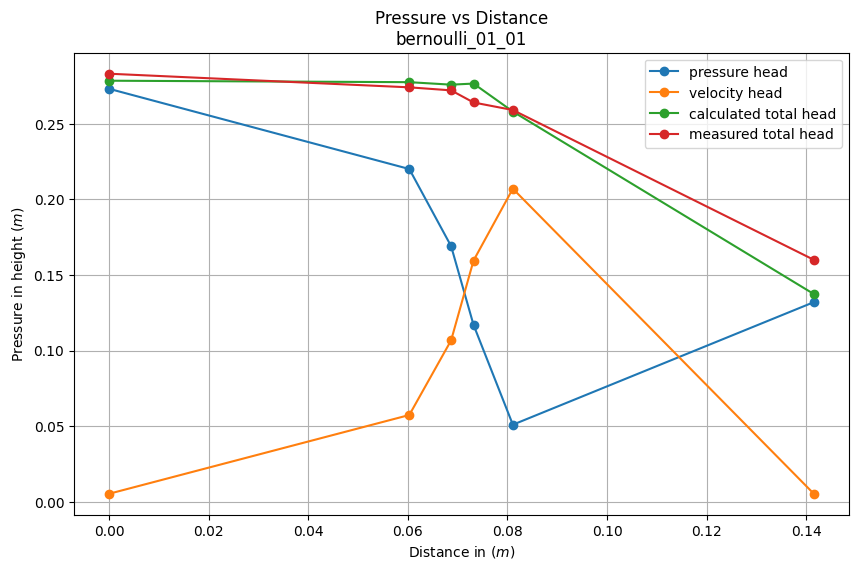

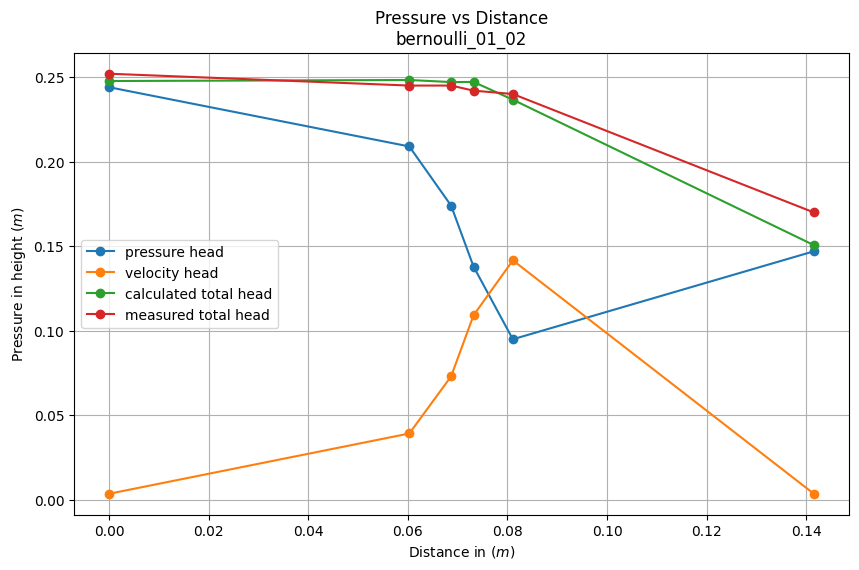

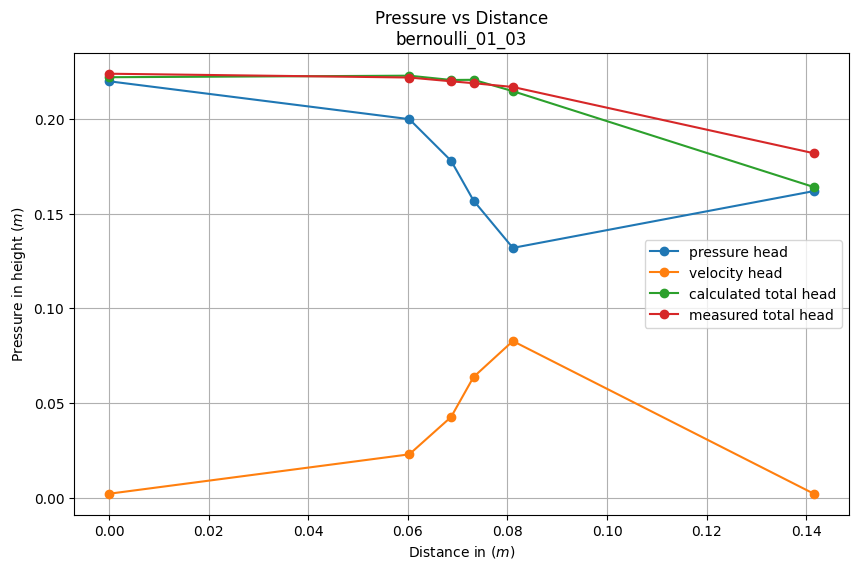

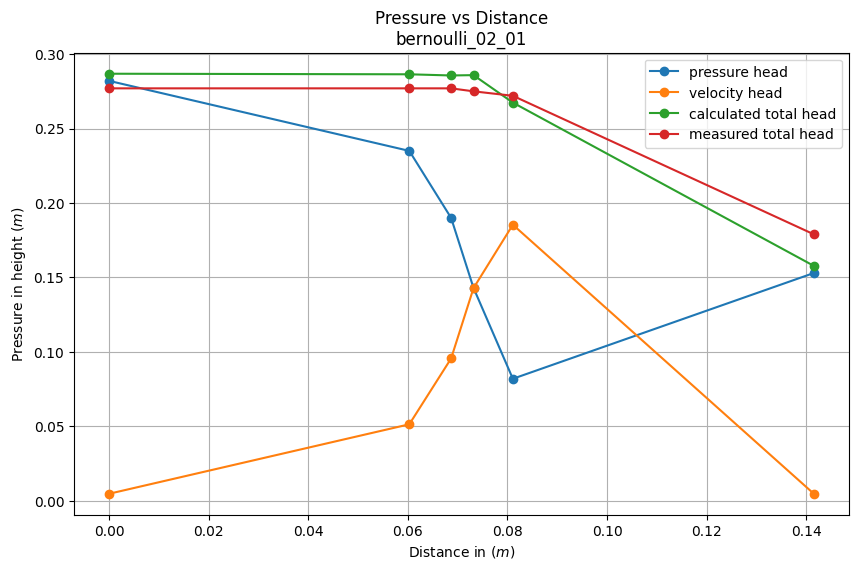

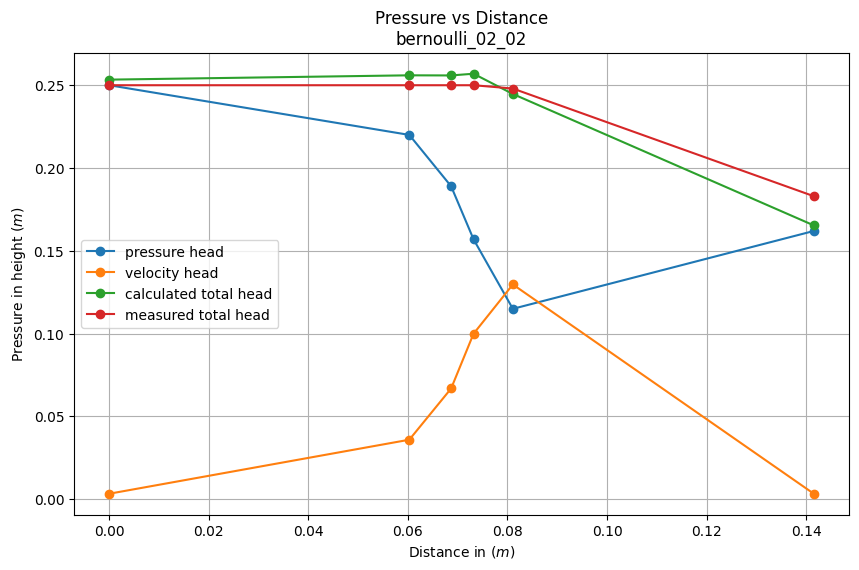

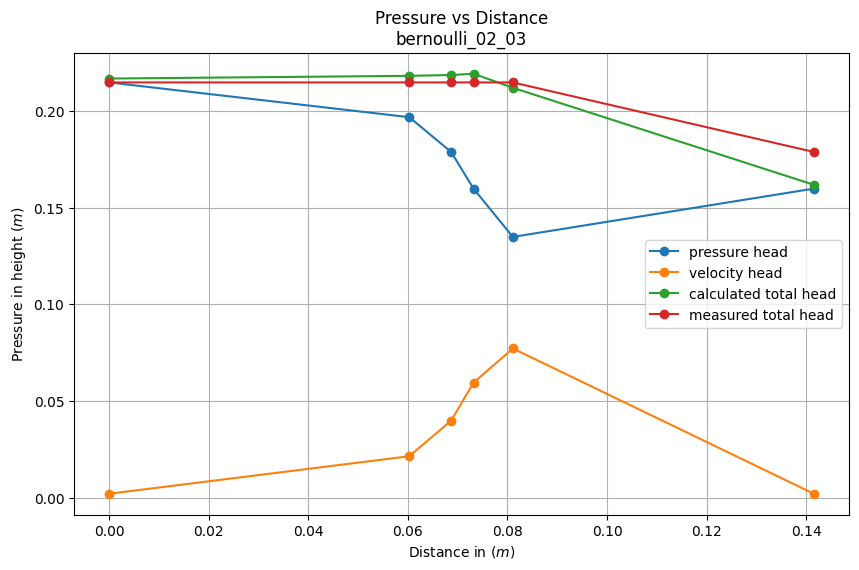

In [9]:
measurements.apply(func=lambda arg: calculations(arg.file_path, arg.file_name), axis=1)